# Сборный проект. Интернет-магазине «Стримчик»

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:**
1. Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
2. Посчитайть суммарные продажи во всех регионах
3. Составить портрет пользователя каждого региона
4. Определить, какие факторы влияют на продажи игр

**Ход исследования:**
Данные об играх я получу из файла `games.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, потребуется обзор данных.

Я проверю данные и их типы на ошибки/неточности и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению анализа.

Таким образом, мое исследование пройдет в 7 этапов:
- Обзор данных
- Предобработка данных
- Расчеты и добавление результатов в таблицу
- Проведение исследоватеьского анализа данных
- Составление портрета пользователя каждого региона и выявление топ жанров/платформ для них
- Проверка гипотез
- Написание общего вывода
   

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


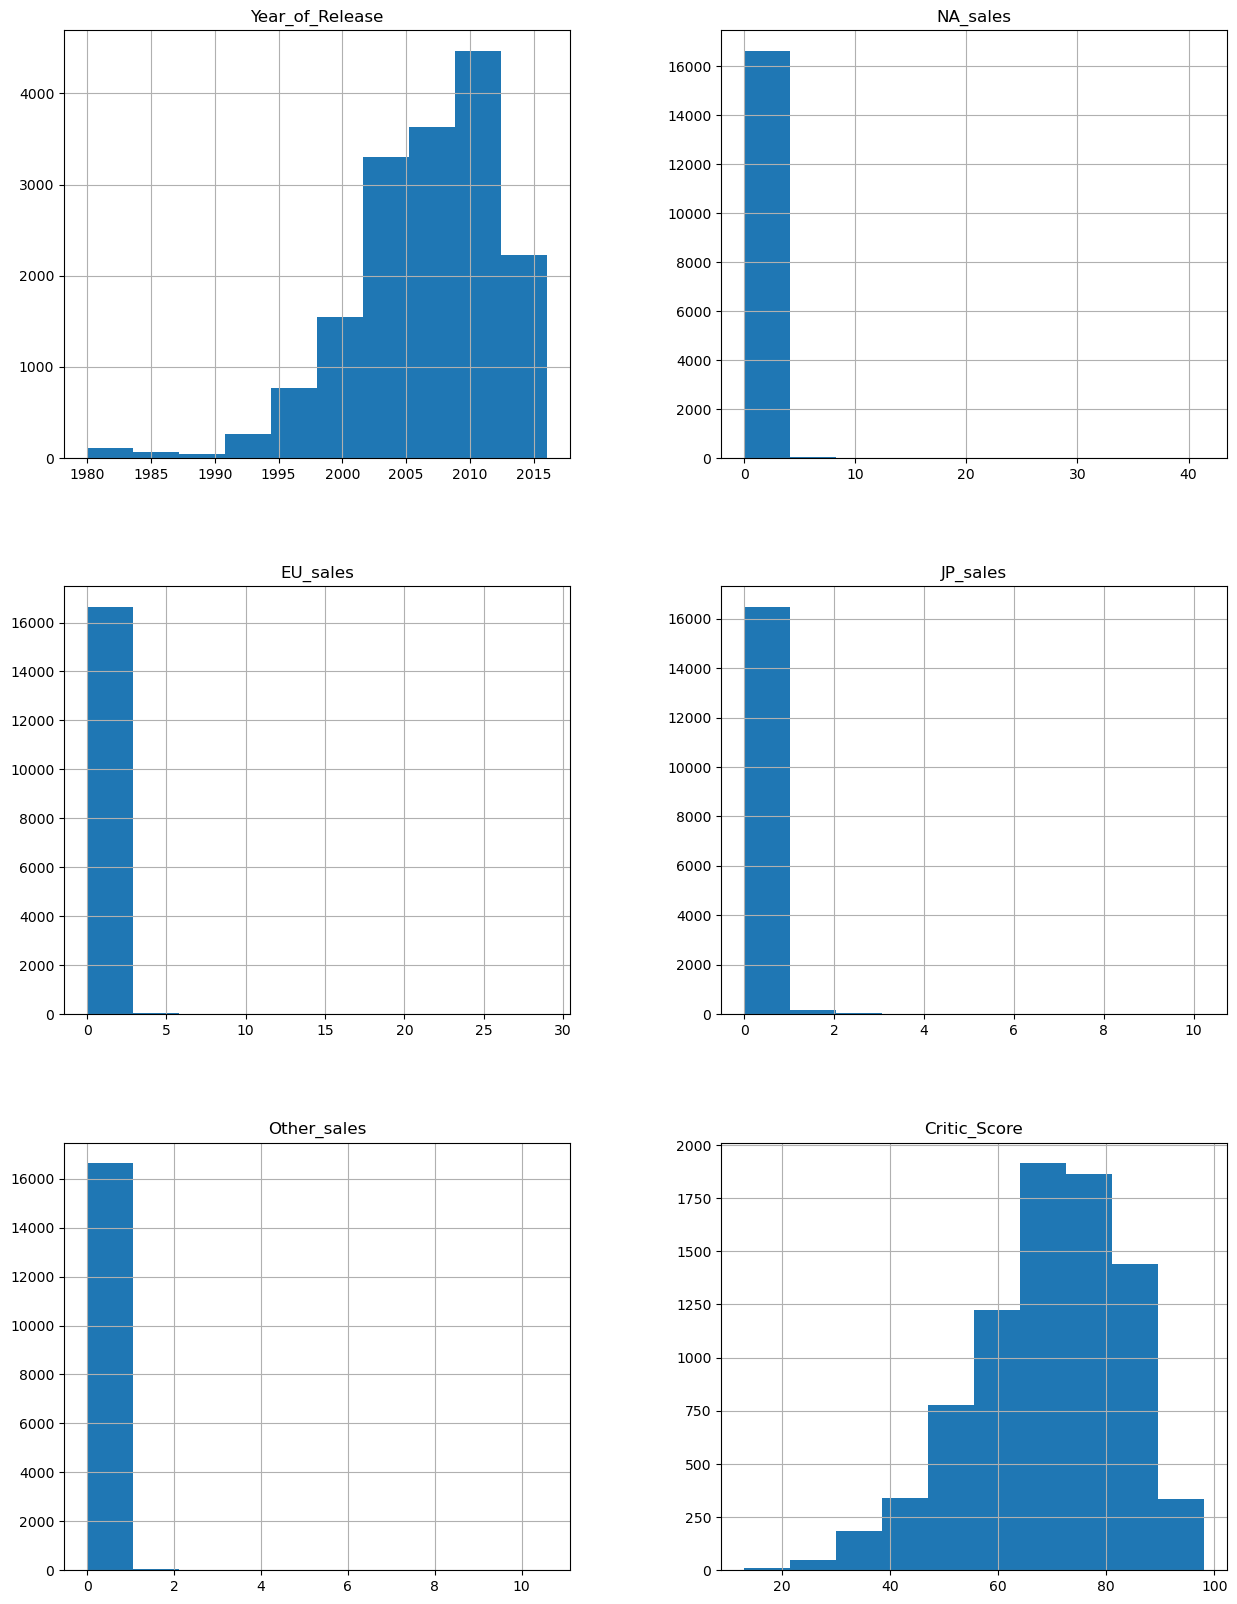

In [3]:
df.hist(figsize=(15, 20));

При первом взгляде на данные можно сказать, что: 
- есть пропущенные значения в столюцах Critic_Score, User_Score, Rating 
- название столбцов необходимо привести к нижнему регистру
- в столбцах Name и Genre  всего 2 пропущенных значения, скорее всего это можно исправить
- в столбце Year_of_Release немного пропущенных значений, скорее всего нет точной даты выхода игры 
- столбец Year_of_Release необходимо заменить тип на int, т.к. год не может быть вещественным числом
- столбец User_Score необходимо заменить тип float, т.к. рейтинг измеряется в числовом формате.

### Подготовьте данные

**Заменим названия столбцов (приведем к нижнему регистру)**

In [4]:
df = df.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales':'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработка пропусков**

Ячейки в которых есть пропуски: platform, year_of_release, genre, critic_score, user_score, rating. Посмотрим на их содержимое.

In [5]:
#смотрим уникальные значения в каждом столбце
display(df['name'].unique())
display(df['year_of_release'].unique())
display(df['genre'].unique())
display(df['critic_score'].unique())
display(df['user_score'].unique())
display(df['rating'].unique())
#считаем пропуски
df.isna().sum()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**В столбце name** - всего 2 пропущеных значения, считаю это не критичным, ими можно пожертвовать.

In [6]:
#удаляем пропуски в столбце name
df = df.dropna(subset=['name'])

**В столбце year_of_release** также не много значений, могли возникнуть из-за того что нет точной даты выгода игры. Это важный критерий для анализа, поэтому их тоже считаю корректным удалить

In [7]:
#удаляем пропуски в столбце year_of_release
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Как можно увидеть **столбец genre** также теперь с полными данными.

**В столбцe critic_score** количество пропусков около половины. Мы не можем отбросить такое количество данных, они нужны нам для анализа. Поэтому предлагаю аменить на заглушки (-1), чтобы не портить рейтинг.

**В столбцe user_score** количество пропусков также около половины. Мы не можем отбросить такое количество данных, они нужны нам для анализа. Неизвестные значения **в столбце user_score** предлагаю заменить на заглушки (-1), чтобы не портить рейтинг.

Кроме того в столбце **user_score** есть данные с аббревиатурой tbd, что переводится как - Будет определено. Можем предположить, что игра вышла недавно или оценок не достаточно для формирования рейтинга, в связи с этим также переводим эти значения в заглушки (-1). **Здесь используем числа в качестве заглушки, для дальнейшего перевода стотбца в тип данных float**

In [8]:
#для столбца critic_score
df['critic_score'] = df['critic_score'].fillna(-1)
#для столбца user_score
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].fillna(-1)



**В столбцe rating** также большое количество пропусков. Мы не можем отбросить такое количество данных, они нужны нам для анализа. Поэтому делаем заглушку 'неизвестно'

In [9]:
df['rating'] = df['rating'].fillna(0)
df.loc[df['rating'] == 0, 'rating'] = 'неизвестно'
df['rating'].unique()

array(['E', 'неизвестно', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Преобразуем данные в нужные типы**

- столбец Year_of_Release необходимо заменить тип на int, т.к. год не может быть вещественным числом
- столбец User_Score необходимо заменить тип float, т.к. рейтинг измеряется в числовом формате.

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


**Считаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неизвестно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,неизвестно,0.01


Сделаем проверку на дубликаты

In [13]:
df.duplicated().sum()

0

**По результатам предобработки данных:**

1. Был заменен тип данных в столбцах:
- year_of_release на тип int, т.к. год не может быть вещественным числом
- user_score на тип float, т.к. рейтинг измеряется в числовом формате.
2. Поработали над пропусками:
- В столбцах name, year_of_release -  было не много пропущенных значений, могли возникнуть из-за того что нет точной даты выгода игры, техническими причинами. Мы их исключили,т.к. это не сыграет важной роли для анализа.
- В столбцах critic_score, user_score количество пропусков около половины. Мы не можем отбросить такое количество данных, они нужны нам для анализа. Поэтому заменили их на заглушки (-1), чтобы не портить рейтинг.
- В столбцe rating также большое количество пропусков. Мы не можем отбросить такое количество данных, они нужны нам для анализа. Поэтому сделали заглушку 'неизвестно', т.к. это категориальные данные.


**В столбце user_score** были данные с аббревиатурой tbd, что переводится как - Будет определено. Можем предположить, что игра вышла недавно или оценок не достаточно для формирования рейтинга, в связи с этим также перевели эти значения в заглушки (-1). Здесь использовали числа в качестве заглушки, для дальнейшего перевода стотбца в тип данных float


### Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы, и важны ли данные за все периоды?**

<AxesSubplot:>

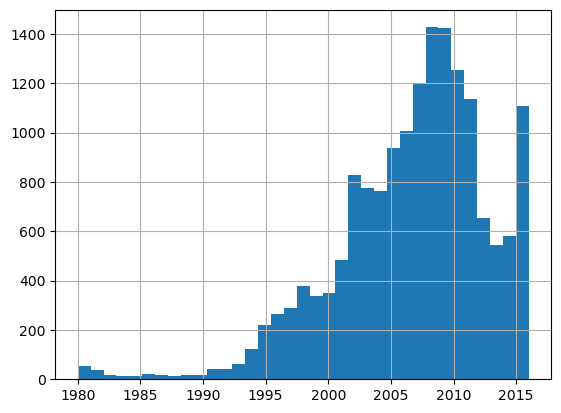

In [14]:
df['year_of_release'].hist(bins=35)

Самый пик выпуска игр приходил на 2006-8 годы - их выпускадось более 1400 шт в год.

Не все данные будут важны для анализа - можно взять данные с 2014 года, когда начался подъем. Все что ранее не соответствует текущему спросу. 

In [15]:
#делаем срез на основе выбранного периода
df = df.query("2014 <= year_of_release <= 2016")
df.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,неизвестно,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,неизвестно,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,неизвестно,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
1685,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01


**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.**

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


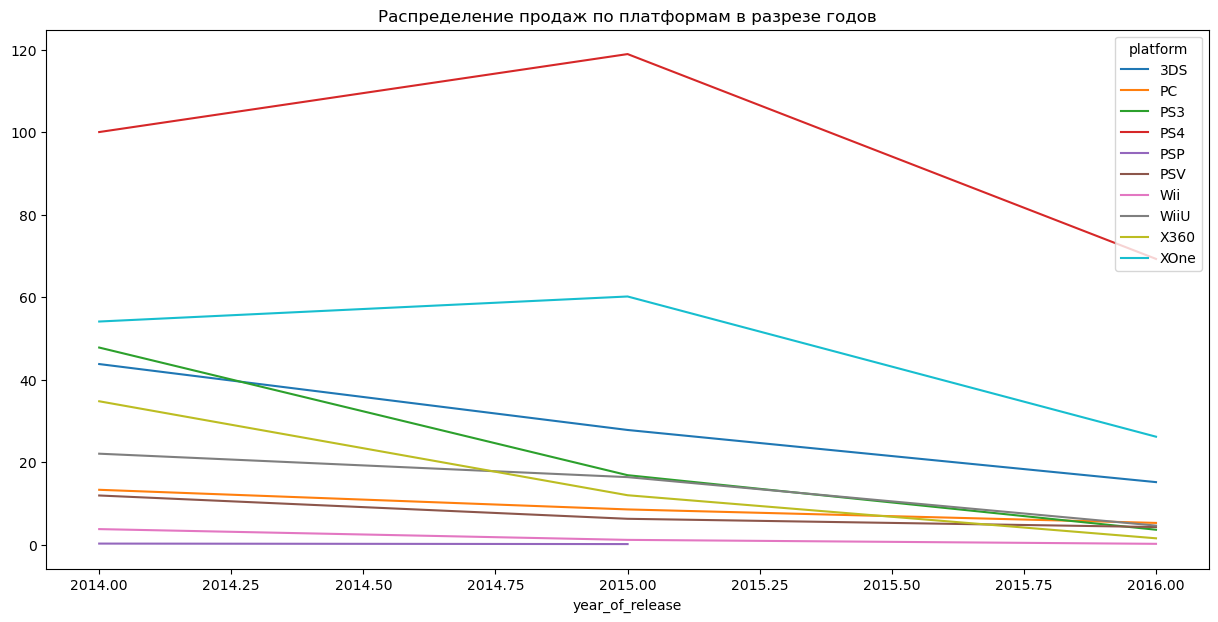

In [16]:
#Считаем продажи по платформам
platform_sales = df.pivot_table(index=('platform'), values='total_sales', aggfunc=(sum)).reset_index().sort_values(by='total_sales', ascending=False).head(10)
#Сохраняем переменную с максимальными продажами по платформам
platform_sales_top = platform_sales['platform']
#Строим график
df.query('platform in @platform_sales_top')\
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')\
.plot(kind='line', figsize=(15,7), title='Распределение продаж по платформам в разрезе годов')

platform_sales

**За какой характерный срок появляются новые и исчезают старые платформы?**

В среднем срок жизни платформ более 3 лет. За последние три года не появилось ни одной новой платформы. Исчезла одна - PSP.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Платформы, которые лидируют по продажам и растут - PS4, XOne. Данные за 2016 год не полные, поэтому мы видим спадю. Они яяются для нас максимально потенциально прибыльными. Платформы с тредом на снижение продаж - 3DS, PS3, X360.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

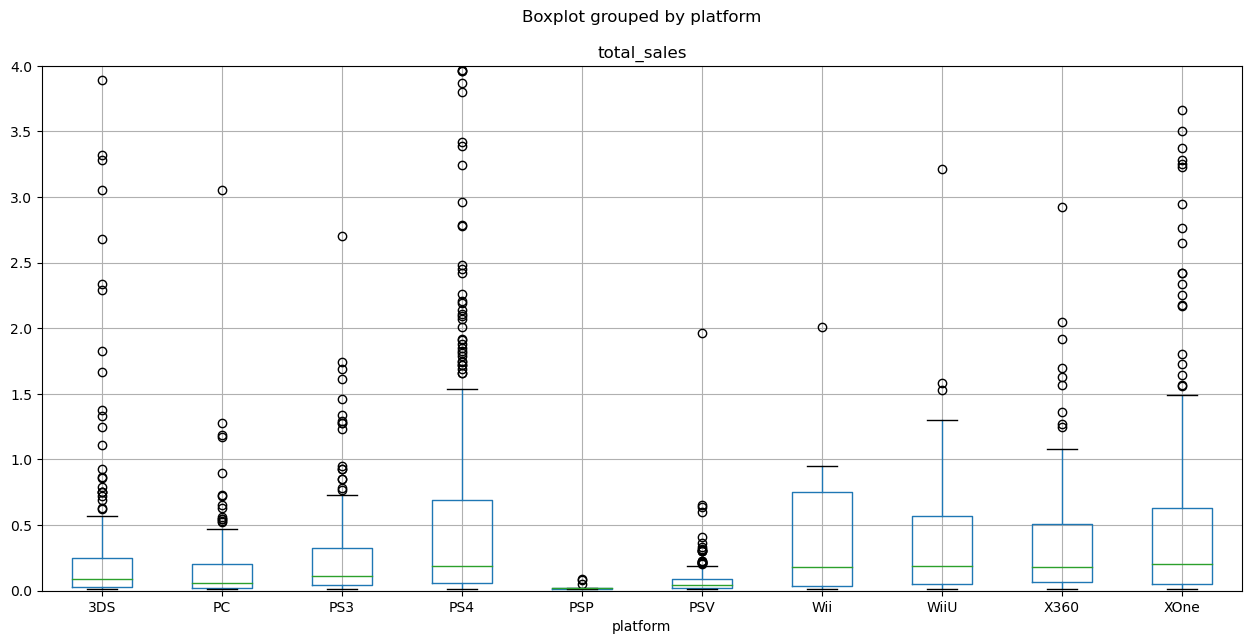

In [17]:
df.boxplot(column='total_sales', by='platform',figsize=(15,7))
plt.ylim(0,4)
plt.show()

В целом, если рассматривать продажи игр по всем платформам, то лидерами продаж являются также PS4 и XOne. Они же являются платформами с рекордным продажами, т.е с максимальным количеством выбросов на масимальных отметках. Также есть платформы с продажами менее 500 тыс копий -PS, PSP, PSV.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Возьмем для анализа платформу XOne

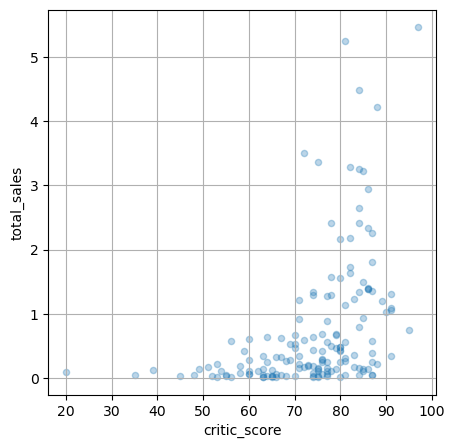

0.2774264504338379

In [18]:
# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
user_score = df.query('platform == "XOne"')
user_score = user_score[user_score['critic_score'] != -1].reset_index()
user_score.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
user_score['user_score'].corr(df['total_sales'])

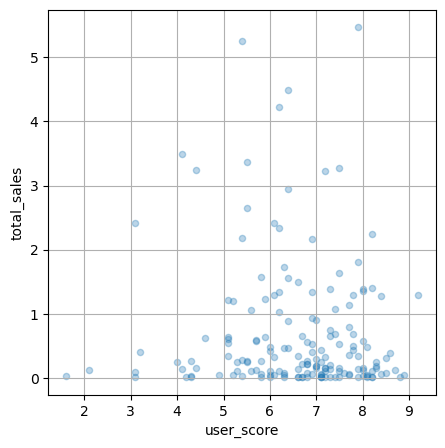

0.2601026361585305

In [19]:
# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
critic_score = df.query('platform == "XOne"')
critic_score = critic_score[critic_score['user_score'] != -1].reset_index()
critic_score.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
critic_score['user_score'].corr(df['total_sales'])

Рассмотрим на примере платформы ХOne. Отзывы пользователей и критикоов имеют небольшое положительное влияние на продажи и могут быть дополнительныс стимулом купить игру.

**Соотнесите выводы с продажами игр на других платформах.**

Рассмотрим другие популярные патформы

**PS4**

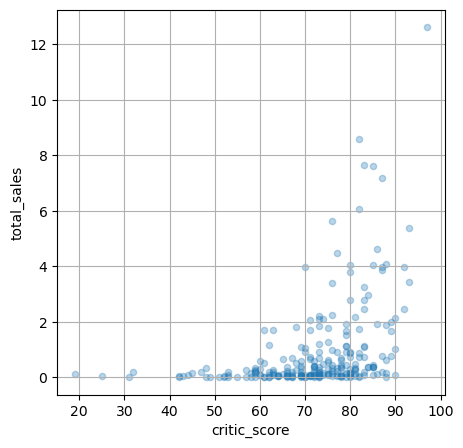

-0.04814704997283808


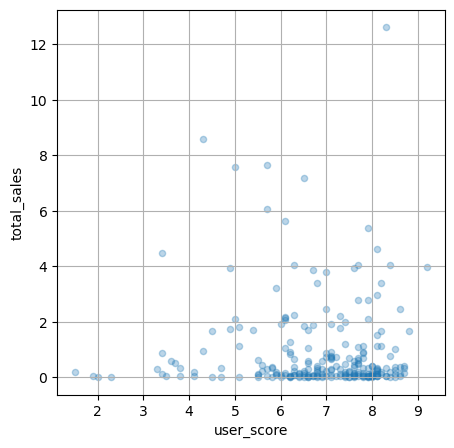

0.09906118548296722

In [20]:
# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
user_score_ps4 = df.query('platform == "PS4"') 
user_score_ps4 = user_score_ps4[user_score_ps4['critic_score'] != -1].reset_index()
user_score_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
print(user_score_ps4['user_score'].corr(df['total_sales']))

# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
critic_score_ps4 = df.query('platform == "PS4"')
critic_score_ps4 = user_score_ps4[user_score_ps4['user_score'] != -1].reset_index()
critic_score_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
critic_score_ps4['user_score'].corr(df['total_sales'])

Отзывы пользователей имеют небольшое положительное влияние на продажи, не существенно влияют на продажи. Отзывы критиков имеют отрицательное влияние на продажи и могут иметь значение при покупке игры.

**3DS**

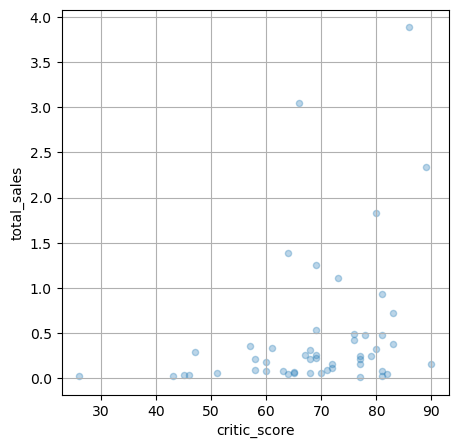

0.7702543029403343


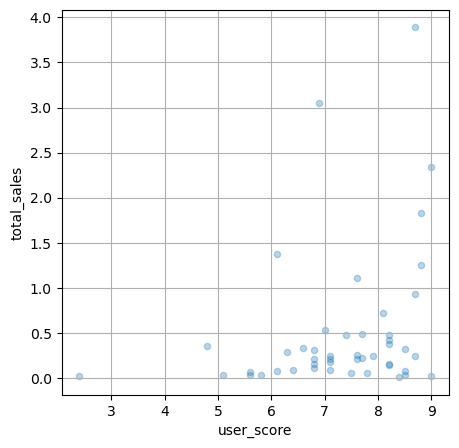

1.0

In [21]:
# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
user_score_3ds = df.query('platform == "3DS"') 
user_score_3ds = user_score_3ds[user_score_3ds['critic_score'] != -1].reset_index()
user_score_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
print(user_score_3ds['user_score'].corr(df['total_sales']))

# делаем срез по платформе без учета данных заглушки -1 в отзывах и строим диаграмму
critic_score_3ds = df.query('platform == "PS4"')
critic_score_3ds = user_score_3ds[user_score_3ds['user_score'] != -1].reset_index()
critic_score_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(5,5), grid=True)
plt.show()
critic_score_3ds['user_score'].corr(df['total_sales'])

Отзывы пользователей и критиков имеют положительное влияние на продажи, существенно влияют на них. Однако по сравнению с предыдущими платформами отзывы на эту платформу оставляли не много, поэтому данных не достаточно для полного вывода.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

<AxesSubplot:title={'center':'Распределение продаж по жанрам'}, xlabel='genre'>

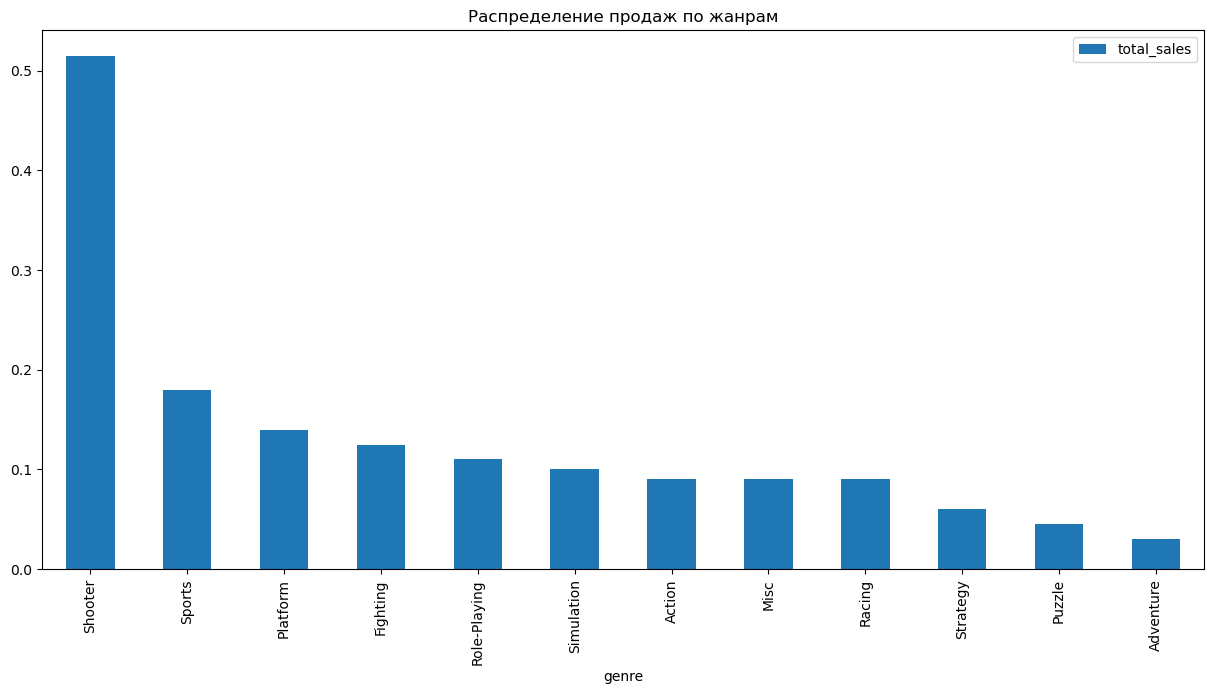

In [22]:
#Считаем продажи по genre
genre_sales = df.pivot_table(index=('genre'), values='total_sales', aggfunc=(sum)).reset_index().sort_values(by='total_sales', ascending=False)
#Сохраняем переменную с максимальными продажами по жанрам
genre_sales_top = genre_sales['genre']
#Строим график
df.query('genre in @genre_sales_top')\
.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', figsize=(15,7), title='Распределение продаж по жанрам')


Самые прибыльные жанры -  Shooter, Sports, Plstform, Fighting, Role-Playing, самые низкие прожажи у жанров - Adventure, Puzzle, Strategy, Racing

**Вывод блока:**
1. Самый пик выпуска игр приходил на 2006-8 годы - их выпускадось более 1400 шт в год. Взяли данные с 2014 года, когда начался подъем. Все что ранее не соответствует текущему спросу.
2. В среднем срок жизни платформ более 3 лет. За последние три года не появилось ни одной новой платформы. Исчезла одна - PSP.
3. Платформы, которые лидируют по продажам и растут - PS4, XOne. Данные за 2016 год не полные, поэтому мы видим спадю. Они яяются для нас максимально потенциально прибыльными. Платформы с тредом на снижение продаж - 3DS, PS3, X360.
4. В целом, если рассматривать продажи игр по всем платформам, то лидерами продаж являются также PS4 и XOne. Они же являются платформами с рекордным продажами, т.е с максимальным количеством выбросов на масимальных отметках. Также есть платформы с продажами менее 500 тыс копий -PS, PSP, PSV.
5. На разные платформы отзывы критиков и пользователей оказывают разное влияние, как положительное так и отрицательное.
6. Самые прибыльные жанры - Shooter, Sports, Plstform, Fighting, Role-Playing, самые низкие прожажи у жанров - Adventure, Puzzle, Strategy, Racing

### Составьте портрет пользователя каждого региона

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

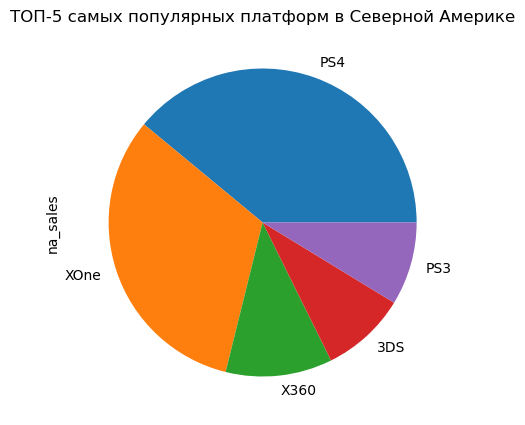

In [23]:
# ТОП-5 самых популярных платформ в Северной Америке 
#группируем по платформе
platform_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_na.plot(x='platform', y='na_sales', kind='pie', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')

plt.show()

Северная Америка:
1. PS4
2. XOne
3. X360
4. 3DS
5. PS3

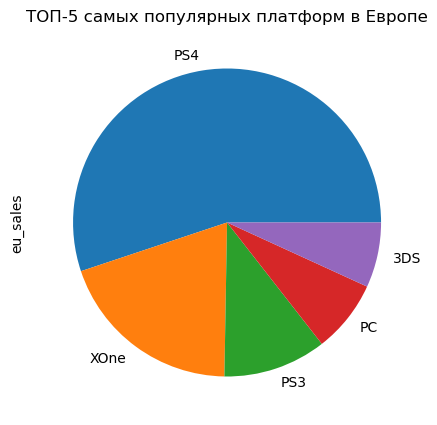

In [24]:
# ТОП-5 самых популярных платформ в Европе 
#группируем по платформе
platform_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_eu.plot(x='platform', y='eu_sales', kind='pie', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
plt.show()

Европа:
1. PS4
2. ХOne
3. PS3
4. PC
5. 3DS

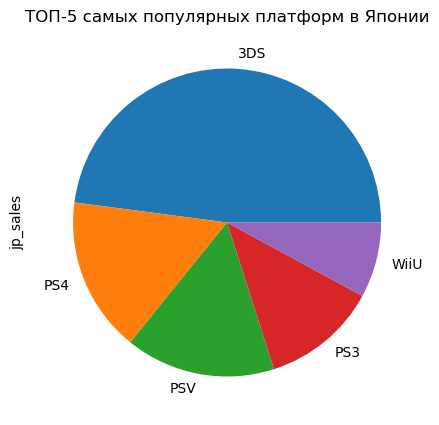

In [25]:
# ТОП-5 самых популярных платформ в Японии
#группируем по платформе
platform_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_jp.plot(x='platform', y='jp_sales', kind='pie', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
plt.show()

Япония:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

Самые популярные жанры (топ-5). Поясните разницу.

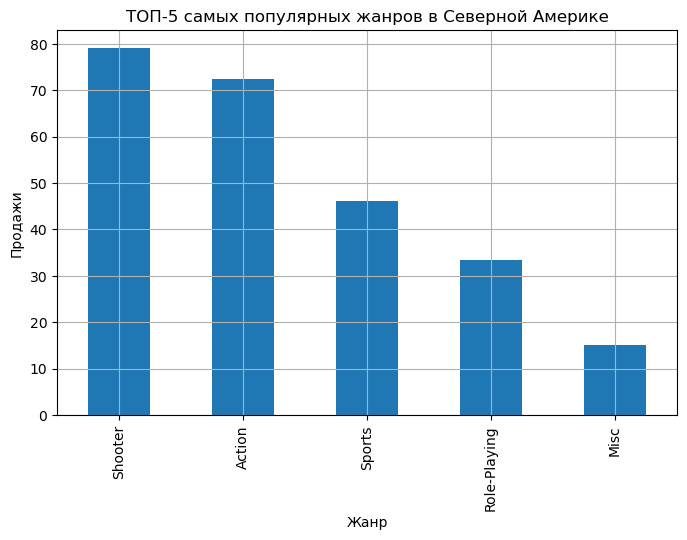

In [26]:
# ТОП-5 самых популярных жанров в Северной Америке 
#группируем по платформе
genre_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_na.plot(x='genre', y='na_sales', kind='bar', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

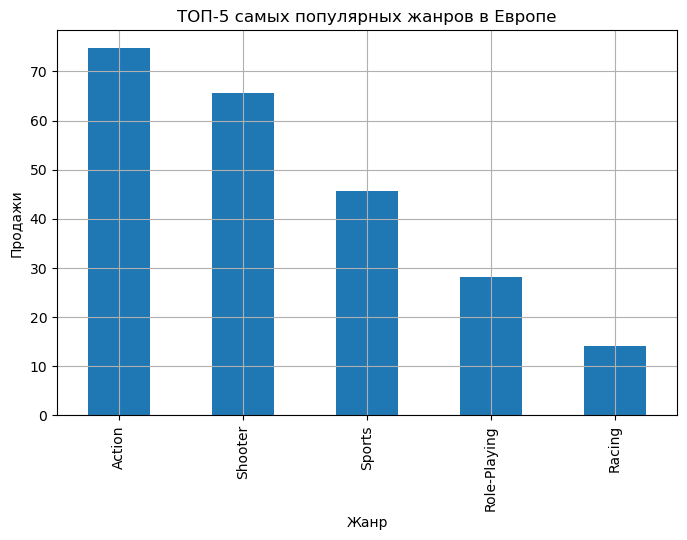

In [27]:
# ТОП-5 самых популярных жанров в европе 
#группируем по платформе
genre_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_eu.plot(x='genre', y='eu_sales', kind='bar', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

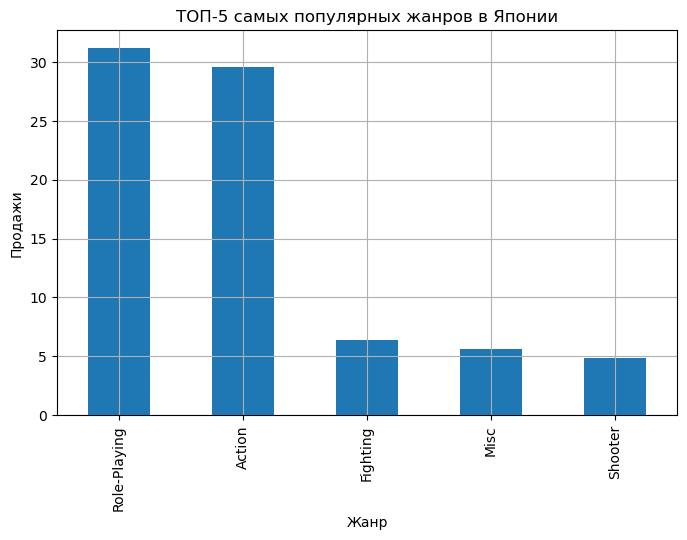

In [28]:
# ТОП-5 самых популярных жанров в Японии 
#группируем по платформе
genre_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_jp.plot(x='genre', y='jp_sales', kind='bar', figsize=(8,5), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Портрет пользователя Европейца похож на жителя Северной Америки, популярные жанры в этих странах очени схожи - в топе Action, Sports и Shooter. Однако для Японцев топ 5 выглдит немного иначе - очень популярны жанры Role-Playing и Figting, что не характерно для жителей других полушарий.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

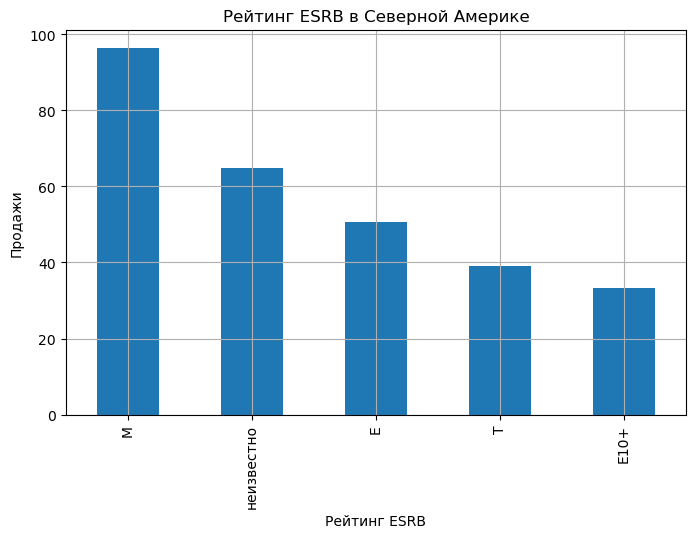

In [29]:
# Рейтинг в Северной Америке 
#группируем по рейтингу
rating_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x='rating', y='na_sales', kind='bar', figsize=(8,5), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

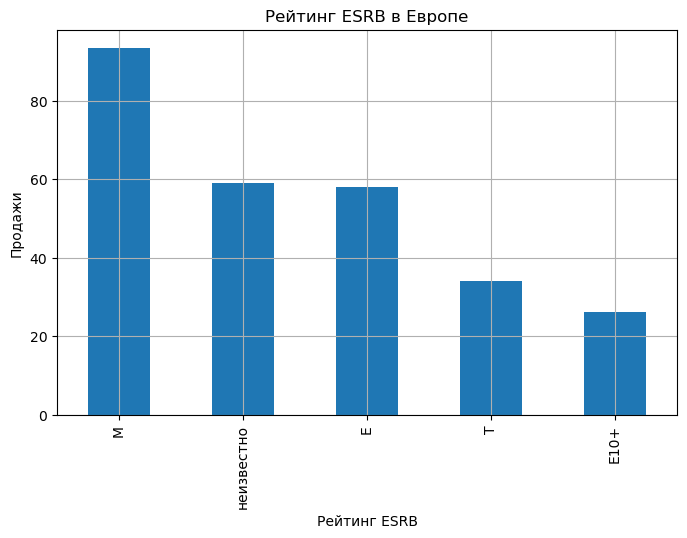

In [30]:
# Рейтинг в Европе 
#группируем по рейтингу
rating_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_eu.plot(x='rating', y='eu_sales', kind='bar', figsize=(8,5), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

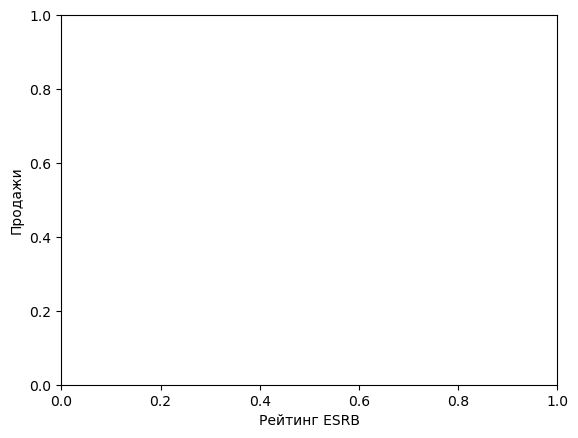

In [31]:
# Рейтинг в Японии
#группируем по рейтингу
rating_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
#построим гистограмму
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

Рейтинг ESRB в  Америке и Европе превалирует M - зрелые. В Японии же более популярны игры с рейтингом T - подросток

### Проверьте гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [32]:
# убираем значения, которые были пропусками
df_user = df[df['user_score'] != -1]
# две выборки по необходимым платформам
df_xbox = df_user[df_user['platform'] == 'XOne']
df_pc = df_user[df_user['platform'] == 'PC']
#обозначаем две выборки конкретных столбцов с пользовательскими рейтингами.
xbox = df_xbox['user_score']
pc = df_pc['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    xbox,
    pc,
    equal_var=False
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные

In [33]:
# убираем значения, которые были пропусками
df_genre = df[df['user_score'] != -1]
# две выборки по необходимым платформам
df_action = df_user[df_user['genre'] == 'Action']
df_sports = df_user[df_user['genre'] == 'Sports']
#обозначаем две выборки конкретных столбцов с пользовательскими рейтингами.
action = df_action['user_score']
sports = df_sports['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action,
    sports,
    equal_var=False
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Как вы сформулировали нулевую и альтернативную гипотезы**

Нулевая гипотеза всегда должна быть равна како-му либо значению, альтернативная - отрицать его.

**Какой критерий применили для проверки гипотез и почему**

Применила критерий статистической значимости 0,05. Общепринятые пороговые значения — 5% и 1%. Т.к. p-value возвращается двусторонней по 2,5% с каждой стороны, булут приемлемы.

### Общий вывод

1. При первом взгляде на данные сделали следующие выводы:

- есть пропущенные значения в столюцах Critic_Score, User_Score, Rating
- название столбцов необходимо привести к нижнему регистру
- в столбцах Name и Genre всего 2 пропущенных значения, скорее всего это можно исправить
- в столбце Year_of_Release немного пропущенных значений, скорее всего нет точной даты выхода игры
- столбец Year_of_Release необходимо заменить тип на int, т.к. год не может быть вещественным числом
- столбец User_Score необходимо заменить тип float, т.к. рейтинг измеряется в числовом формате.

2. По результатам предобработки данных:

- Был заменен тип данных в столбцах: year_of_release, user_score
- Поработали над пропусками: в столбцах name, year_of_release, critic_score, user_score, rating

3. В хоже исследовательского анализа было выявлено:
- Самый пик выпуска игр приходил на 2006-8 годы - их выпускадось более 1400 шт в год. Взяли данные с 2014 года, когда начался подъем. Все что ранее не соответствует текущему спросу.
- В среднем срок жизни платформ более 3 лет. За последние три года не появилось ни одной новой платформы. Исчезла одна - PSP.
- Платформы, которые лидируют по продажам и растут - PS4, XOne. Данные за 2016 год не полные, поэтому мы видим спадю. Они яяются для нас максимально потенциально прибыльными. Платформы с тредом на снижение продаж - 3DS, PS3, X360.
- В целом, если рассматривать продажи игр по всем платформам, то лидерами продаж являются также PS4 и XOne. Они же являются платформами с рекордным продажами, т.е с максимальным количеством выбросов на масимальных отметках. Также есть платформы с продажами менее 500 тыс копий -PS, PSP, PSV.
- На разные платформы отзывы критиков и пользователей оказывают разное влияние, как положительное так и отрицательное.
- Самые прибыльные жанры - Shooter, Sports, Plstform, Fighting, Role-Playing, самые низкие прожажи у жанров - Adventure, Puzzle, Strategy, Racing

4. Портрет пользователя:
- Самые популярные платформы (топ-5): Северная Америка: PS4, XOne, X360, 3DS, PS3. Европа: PS4, ХOne, PS3, PC, 3DS Япония: 3DS, PS4, PSV, PS3, WiiU.
- Самые популярные жанры: Портрет пользователя Европейца похож на жителя Северной Америки, популярные жанры в этих странах очени схожи - в топе Action, Sports и Shooter. Однако для Японцев топ 5 выглдит немного иначе - очень популярны жанры Role-Playing и Figting, что не характерно для жителей других полушарий.
- Рейтинг ESRB в  Америке и Европе превалирует M - зрелые. В Японии же более популярны игры с рейтингом T - подросток.

5. Проверка гипотез:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу

Средние пользовательские рейтинги жанров Action и Sports одинаковые

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу
